In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

## 1.Pytorch Basics
## 2. Tensor Operations
## 3. Evaluating Derivatives
## 4. Linear Regression with Pytorch

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later). The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

## 1.Pytorch Basics

In [2]:
x = torch.tensor([2.,3.,6.])

In [3]:
print(x)
print(x.shape)
print(x.type())

tensor([2., 3., 6.])
torch.Size([3])
torch.FloatTensor


In [4]:
A = torch.tensor([[3,4],
                 [9,5]])

In [5]:
print(A)
print(A.shape)
print(A.type())

tensor([[3, 4],
        [9, 5]])
torch.Size([2, 2])
torch.LongTensor


In [6]:
print(A[0,1])
print(A[1,1])

tensor(4)
tensor(5)


We have tons of methods to create special types of tensors

In [7]:
#axis=0
print(A[0])
print(A[1])

tensor([3, 4])
tensor([9, 5])


In [8]:
x = torch.rand(3,3)
print(x)

tensor([[0.1210, 0.7030, 0.8923],
        [0.7142, 0.2189, 0.4940],
        [0.6782, 0.2528, 0.6744]])


In [9]:
x = torch.randint(0,10, size=(4,4))
x

tensor([[8, 1, 0, 8],
        [4, 2, 6, 9],
        [2, 0, 2, 5],
        [7, 1, 2, 3]])

In [10]:
x = torch.ones(4,4)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [11]:
# (Batch, Channel, Height, Width)

## 2. Tensor Operations

In [12]:
A = torch.tensor([[3,4,7,7],
                  [9,5,9,1],
                  [-4,-3,5,0],
                  [-1,-2,5,1]])

In [13]:
A[0,:]

tensor([3, 4, 7, 7])

In [14]:
A[0:2,1:3]

tensor([[4, 7],
        [5, 9]])

In [15]:
B = torch.tensor([[1,1,1,1],
                  [2,2,2,2],
                  [3,3,3,3]])
print(B)

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])


Some unexpected results

In [16]:
#sum over the elements of the first axis, which are the rows in fact.
B.sum(dim=0)

tensor([6, 6, 6, 6])

In [17]:
print(B[0])
print(B[1])
print(B[2])
print('B[0]+B[1]+B[2] = ',B[0]+B[1]+B[2])

tensor([1, 1, 1, 1])
tensor([2, 2, 2, 2])
tensor([3, 3, 3, 3])
B[0]+B[1]+B[2] =  tensor([6, 6, 6, 6])


In [18]:
B.sum(dim=1)

tensor([ 4,  8, 12])

In [19]:
print(B[0].sum())
print(B[1].sum())
print(B[2].sum())

tensor(4)
tensor(8)
tensor(12)


Manipulating tensor with reshape, view, flatten

In [20]:
B = torch.randint(10,(3,4))
print('Before reshape =:\n',B)
C = torch.reshape(B,(2,6))
print('\nAfter reshape:\n', C)


Before reshape =:
 tensor([[5, 0, 5, 0],
        [6, 2, 2, 6],
        [2, 4, 6, 6]])

After reshape:
 tensor([[5, 0, 5, 0, 6, 2],
        [2, 6, 2, 4, 6, 6]])


In [21]:
#let the torch handle the other axis
C = B.view(-1,4)
print(C)

tensor([[5, 0, 5, 0],
        [6, 2, 2, 6],
        [2, 4, 6, 6]])


In [22]:
B.flatten()

tensor([5, 0, 5, 0, 6, 2, 2, 6, 2, 4, 6, 6])

In [23]:
B.view(-1)

tensor([5, 0, 5, 0, 6, 2, 2, 6, 2, 4, 6, 6])

One important operation includes "torch.argmax" and "torch.eq" operations. Imagine we are doing image classification with 4 classes 

$A = 0, B = 1 ,C = 2, D = 3$

What we do, we feed many images at the same time. Let's say we feed 2 class-B and 1 class-D. Our label array is

$$\text{label} = [1,1,3]$$

When we get the output from the model, it will look like;


$$
A = 
\begin{bmatrix}
12.2099 & 7.4075 & 1.9746,& 4.5719 \\
0.4014 & 19.8903 & 9.4084 & 9.3722 \\
3.3393 & 5.6968 & 8.2905 & 12.3987
\end{bmatrix}
$$

First row is the prediction for the first image and so on. Now, in each row, we get the index of largest entry and put this in an array using **"argmax"** command. This will be our prediction array. In this case, it must be

$$ \text{predictions} = [0,1,3]$$ 
Then we will count how many of the predictions is right. To do so, we will first Boolen compare labels and predictions using **"eq"** then count the True entries using **"sum"**. Carefully follow the example below

In [24]:
# correct labels: A,B,A,C,D,A,C
label = torch.randint(0,4,size=(1,20))
label

tensor([[1, 2, 0, 0, 1, 3, 0, 3, 2, 2, 3, 1, 2, 3, 0, 3, 2, 1, 3, 2]])

In [25]:
output = 10*torch.rand(20,4)
print(output)

tensor([[6.2391, 7.8266, 0.2617, 8.1295],
        [2.5926, 3.0768, 5.8584, 8.5440],
        [3.3745, 4.7753, 5.6918, 0.4123],
        [6.4879, 4.8537, 5.1889, 9.8801],
        [5.8539, 4.6484, 6.9507, 6.7989],
        [0.8537, 7.2247, 1.2301, 4.9010],
        [9.1519, 9.8201, 4.7726, 8.5189],
        [2.2793, 2.8291, 1.7444, 5.5313],
        [9.7207, 9.1384, 0.1421, 3.2617],
        [2.2582, 9.9243, 2.3093, 4.6189],
        [2.6576, 0.3154, 6.1729, 4.7953],
        [5.2210, 2.4563, 5.8226, 9.6963],
        [8.7886, 0.4920, 6.1162, 1.7497],
        [3.8456, 4.2289, 8.0531, 4.7265],
        [5.9758, 5.4903, 3.6477, 4.2173],
        [3.8253, 1.9863, 4.4467, 2.3007],
        [3.4787, 1.7395, 9.5744, 8.7412],
        [2.5035, 7.4978, 2.6489, 2.7165],
        [7.9549, 8.7801, 3.3418, 9.6560],
        [8.8390, 0.2873, 0.2649, 5.0737]])


In [26]:
predictions = output.argmax(dim=1)
print(predictions)

tensor([3, 3, 2, 3, 2, 1, 1, 3, 0, 1, 2, 3, 0, 2, 0, 2, 2, 1, 3, 0])


In [27]:
predictions.eq(label)

tensor([[False, False, False, False, False, False, False,  True, False, False,
         False, False, False, False,  True, False,  True,  True,  True, False]])

In [28]:
number_of_correct = torch.sum(predictions.eq(label))
print(number_of_correct.item())

5


## 3. Evaluating Derivatives with Pytorch

**Ex-1**

Find the derivative of $f(x) = 3x^2$ at $x=1$. Note that the answer is 6.

In [29]:
x = torch.tensor(1.,requires_grad = True)
y = 3*x**2
y.backward()
print(x.grad)

tensor(6.)


**Ex2**

Calculate the derivative of $f(x) = \big(x^2+ 7x + \cos(x)\big)^3 $ at $x=0$. Since $f'(x) = 3\big(x^2+ 7x + \cos(x)\big)^2\big(x+7-\sin(x)\big)$, we must have $f'(0)=21$ 

In [30]:
x = torch.tensor(0.,requires_grad = True)
y = (x**2 + 7*x + torch.cos(x))**3
y.backward()
print(x.grad)

tensor(21.)


**Ex3**

Now, let's evaluate partial derivatives. $f(x,y) = x^2+y^2 + e^{x+y}\cos(xy)$ at $x=1,y=2$

In [31]:
x = torch.tensor(1.,requires_grad = True)
y = torch.tensor(2.,requires_grad = True)
f = x**2 + y**2 + torch.exp(x+y)*torch.cos(x*y)
f.backward()
print('f_x: ',x.grad)
print("f_y: ",y.grad)

f_x:  tensor(-42.8860)
f_y:  tensor(-22.6223)


## 4. Linear Regression with Pytorch

Now, let's see how we do gradient decent with Pytorch. Our toy example is a simple linear regression problem. We will find the best line $$y=wx+c$$ to approximate a given set of data points $(x_i,y_i)_{i=1}^{N}$. Idea is to minimize the mean-square cost (MSE) function $$C=\dfrac{1}{N}\sum_{i=1}^{N}\Big(y(x_i)-y_i\Big)^2$$

Using chain rule, we can see that $$\dfrac{\partial C}{\partial w} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)x_i$$, $$ \dfrac{\partial C}{\partial b} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)1$$
Now we can go ahead and write the gradient decent for this problem. 

\begin{align}
    \begin{bmatrix}
           w_{n+1} \\
           b_{n+1} \\
     \end{bmatrix} =
     \begin{bmatrix}
           w_{n} \\
           b_{n} \\
      \end{bmatrix} -
      r\begin{bmatrix}
           \dfrac{\partial C}{\partial w} \\
          \dfrac{\partial C}{\partial b} \\
      \end{bmatrix}
\end{align}

We will have two approches;

- Implement naive graident decent with Pytorch
- Use optimizer provided by Pytorch

We can notice that Pytorch's implementation is way better in terms of error. That's why we must use the optimization tools provided in Pytorch

### a. Implement Naive Graident Decent with Pytorch

In [32]:
def MSE(y,y_pred):
    return ((y-y_pred)**2).mean()

def model(w,b,x):
    return w*x+b

@torch.no_grad()
def DisplayResults(w,b,X_test,Y_test):
    y_preds = w * X_test + b
    plt.figure(figsize=(6,5))
    plt.plot(X_test,y_preds,'-b',X_test,Y_test,'ro',markersize = 2)
    plt.legend(['predicted','real_values'])
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.title('Linear_Regression_Model')
    plt.show()
    

In [33]:
#Pick w = 7 and b = 3 and some noise
N = 300
X = torch.rand(N)
Y = 7*X + 3*torch.ones(N) + torch.rand(N)

#train-test split
X_train = X[0:math.ceil(N*0.8)]
X_test = X[math.ceil(N*0.8):]

Y_train = Y[0:math.ceil(N*0.8)]
Y_test = Y[math.ceil(N*0.8):]

In [34]:
# initilize weight and bias
num_epochs = 400
lr = 1e-1
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
for i in range(num_epochs):
    #(1)FORWARD PASS
    
    #compute the predictions
    y_pred = model(w,b,X_train)
    
    #compute the loss
    loss = MSE(Y_train,y_pred)
    
    #(2)BACK-PROPOGATION    
    
    #compute the gradients
    loss.backward()
    with torch.no_grad():
        w.data = w.data - lr * w.grad
        b.data = b.data - lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    if i%100==0:
        print(f'w: {w.item():0.5f} b : {b.item():0.5f} loss : {loss.item():0.8f}')

w: 1.57212 b : 1.72752 loss : 42.59046936
w: 6.16068 b : 3.97917 loss : 0.17162088
w: 6.87718 b : 3.57956 loss : 0.09409192
w: 7.07914 b : 3.46692 loss : 0.08793244


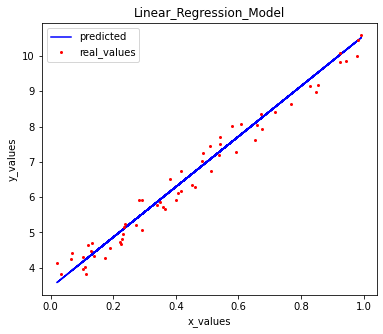

In [35]:
DisplayResults(w,b,X_test,Y_test)

### b. Implement  Graident Decent with Pytorch Optimizer

In [36]:
#Better way of doing gradient decent. In fact, this is what we must do!
optimizer = torch.optim.Adam([w, b], lr = 0.1)
for i in range(num_epochs):
    #(1)FORWARD PASS
    
    #compute the predictions
    y_pred = model(w,b,X_train)
    
    #compute the loss
    loss = MSE(Y_train,y_pred)
    
    #(2)BACK-PROPOGATION    
    
    #compute the gradients
    loss.backward()
    
    #update the parameters
    optimizer.step()
    
    #detach the gradients
    optimizer.zero_grad()
    
    if i%100==0:
        print(f'w: {w.item():0.5f} b : {b.item():0.5f} loss : {loss.item():0.8f}')

w: 7.23577 b : 3.33533 loss : 0.08744308
w: 7.15785 b : 3.42264 loss : 0.08740088
w: 7.15841 b : 3.42271 loss : 0.08740085
w: 7.15840 b : 3.42271 loss : 0.08740086


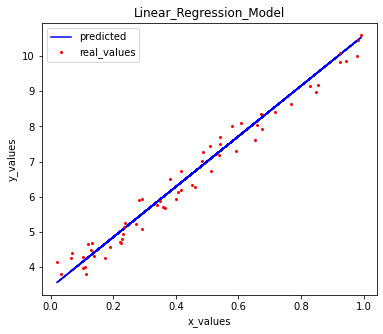

In [37]:
DisplayResults(w,b,X_test,Y_test)